In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 100)

## Carga del dataset

Utilizando spark se realizo una partición del 2.5% de los datos del dataset original.

In [112]:
with open("header.txt", "r") as f:
    line = f.readline()
    cols = line.split(",")
    
df = pd.read_csv("data_sample.csv", header = None, sep = ",", names = cols)
df.head()

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,202003,2089776,19840630,35.63860,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526,1.00000,10,N,N,CALI,VALLE,CALI,VALLE,\N,NaN,NaN,NaN,NaN,0.00000,NO,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,1255032.00000,0.00000,1255032.00000,NOM,1391032.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,695516.00000,C,0.00000,\N,1255032.00000,NaN,304687.00000
1,201902,2088089,19860727,32.47639,M,UNION LIBRE,NO INFORMA,\N,Independiente,FAMILIAR,20181120,4.00000,8230,N,N,PALMIRA,VALLE,\N,\N,\N,NaN,NaN,NaN,NaN,0.00000,NO,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,0.00000,0.00000,0.00000,\N,2327500.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,1187025.00000,SIN INFO,NaN,\N,NaN,NaN,187990.00000
2,202001,3892351,19910108,28.93634,M,SOLTERO,TECNOLOGO,OTROS,Independiente,\N,20190802,4.00000,10,N,N,MEDELLIN,ANTIOQUIA,\N,\N,\N,0.00000,0.00000,0.00000,0.00000,0.00000,SI,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,0.00000,0.00000,0.00000,\N,6519750.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,3879251.25000,SIN INFO,NaN,\N,NaN,NaN,862348.92000
3,202008,2897552,19900903,29.88364,M,SOLTERO,BACHILLER,\N,Empleado,\N,20190906,1.00000,10,N,N,MEDELLIN,ANTIOQUIA,MEDELLIN,ANTIOQUIA,\N,1.00000,0.00000,0.00000,0.00000,0.00000,NO,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,0.00000,0.00000,0.00000,\N,1484205.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,524000.00000,0.00000,0.00000,0.00000,2555000.00000,0.00000,0.00000,1.00000,210681.47500,F,7.00000,\N,NaN,1484205.00000,1056864.00000
4,202001,4782141,19790623,40.48186,F,NO INFORMA,SIN INFORMACION,\N,Empleado,\N,20191211,1.00000,10,N,N,BOGOTA D.C.,CUNDINAMARCA,\N,\N,\N,0.00000,0.00000,0.00000,0.00000,0.00000,NO,0.00000,X,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,4353538.00000,0.00000,4353538.00000,NOM,4353334.00000,0.00000,0.00000,0.00000,386578.00000,11000.00000,1006000.00000,0.00000,28000.00000,25800000.00000,16242500.00000,751000.00000,211000.00000,0.00000,4.00000,0.00000,1615755.80000,C,0.00000,70831,4353538.00000,3500000.00000,248386.00000


In [113]:
df.shape

(524623, 65)

## Analisis exploratorio de datos

### Separación de los datos en categoricos y numericos

In [114]:
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])

In [115]:
numerical.head()

,periodo,id_cli,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,cuota_tc_bancolombia,nro_tot_cuentas,ctas_activas,ctas_embargadas,cuota_cred_hipot,mediana_nom3,mediana_pen3,ingreso_nompen,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,pol_centr_ext,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,202003,2089776,19840630,35.63860,20180526,1.00000,10,NaN,NaN,NaN,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,1255032.00000,0.00000,1255032.00000,1391032.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,695516.00000,0.00000,1255032.00000,NaN,304687.00000
1,201902,2088089,19860727,32.47639,20181120,4.00000,8230,NaN,NaN,NaN,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,0.00000,0.00000,0.00000,2327500.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,1187025.00000,NaN,NaN,NaN,187990.00000
2,202001,3892351,19910108,28.93634,20190802,4.00000,10,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,0.00000,0.00000,0.00000,6519750.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,3879251.25000,NaN,NaN,NaN,862348.92000
3,202008,2897552,19900903,29.88364,20190906,1.00000,10,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,0.00000,0.00000,0.00000,1484205.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,524000.00000,0.00000,0.00000,0.00000,2555000.00000,0.00000,0.00000,1.00000,210681.47500,7.00000,NaN,1484205.00000,1056864.00000
4,202001,4782141,19790623,40.48186,20191211,1.00000,10,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,4353538.00000,0.00000,4353538.00000,4353334.00000,0.00000,0.00000,0.00000,386578.00000,11000.00000,1006000.00000,0.00000,28000.00000,25800000.00000,16242500.00000,751000.00000,211000.00000,0.00000,4.00000,0.00000,1615755.80000,0.00000,4353538.00000,3500000.00000,248386.00000


In [116]:
categorical.head()

,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,tenencia_tc,tiene_consumo,tiene_crediagil,tiene_ctas_activas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,cat_ingreso,rep_calif_cred,convenio_lib
0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,N,N,CALI,VALLE,CALI,VALLE,\N,NO,\N,\N,X,\N,\N,\N,\N,NOM,C,\N
1,M,UNION LIBRE,NO INFORMA,\N,Independiente,FAMILIAR,N,N,PALMIRA,VALLE,\N,\N,\N,NO,\N,\N,X,\N,\N,\N,\N,\N,SIN INFO,\N
2,M,SOLTERO,TECNOLOGO,OTROS,Independiente,\N,N,N,MEDELLIN,ANTIOQUIA,\N,\N,\N,SI,\N,\N,X,\N,\N,\N,\N,\N,SIN INFO,\N
3,M,SOLTERO,BACHILLER,\N,Empleado,\N,N,N,MEDELLIN,ANTIOQUIA,MEDELLIN,ANTIOQUIA,\N,NO,\N,\N,X,\N,\N,\N,\N,\N,F,\N
4,F,NO INFORMA,SIN INFORMACION,\N,Empleado,\N,N,N,BOGOTA D.C.,CUNDINAMARCA,\N,\N,\N,NO,X,\N,X,\N,\N,\N,\N,NOM,C,70831


### Variables categoricas

In [117]:
def fix_academic(x: str) -> str:
    x = x.lower()
    if x == "sin informacion": return "no informa"
    return x.capitalize()
categorical["nivel_academico"] = categorical["nivel_academico"].apply(fix_academic)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [118]:
def fix_department(x: str) -> str:
    x = x.lower()
    if x == "nari#o": return "Nariño"
    return x.capitalize()
categorical["departamento_residencia"] = categorical["departamento_residencia"].apply(fix_department)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [134]:
def fix_civil(x: str) -> str:
    x = x.lower()
    if x == "\\n" or x == "no informa": return "Otro"
    return x.capitalize()
categorical["estado_civil"] = categorical["estado_civil"].apply(fix_civil)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [144]:
def fix_vivienda(x: str) -> str:
    x = x.lower()
    if x == "\\n": return "No informa"
    return x.capitalize()
categorical["tipo_vivienda"] = categorical["tipo_vivienda"].apply(fix_vivienda)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [151]:
tv = pd.DataFrame(categorical["tipo_vivienda"].value_counts())
tv["tipo"] = tv.index
tv = tv.rename({'tipo_vivienda': 'Total'}, axis=1).reset_index()
del tv["index"]
tv

,Total,tipo
0,272439,No informa
1,121578,Familiar
2,85514,Propia
3,45092,Alquilada


In [139]:
ec = pd.DataFrame(categorical["estado_civil"].value_counts())
ec["status"] = ec.index
ec = ec.rename({'estado_civil': 'Total'}, axis=1).reset_index()
del ec["index"]
ec

,Total,status
0,237935,Soltero
1,144143,Casado
2,61539,Union libre
3,50943,Otro
4,21241,Divorciado
5,8822,Viudo


In [119]:
cs = pd.DataFrame(categorical["departamento_residencia"].value_counts())
cs["departamento"] = cs.index
cs = cs.rename({'departamento_residencia': 'Total'}, axis=1).reset_index()
del cs["index"]
cs = cs[cs["departamento"] != "\\n"]

In [120]:
na = pd.DataFrame(categorical["nivel_academico"].value_counts())
na["estudios"] = na.index
na = na.rename({'nivel_academico': 'Total'}, axis=1).reset_index()
del na["index"]

In [121]:
cs

,Total,departamento
0,168280,Antioquia
1,117190,Bogota d.c.
2,45892,Valle
3,32904,Cundinamarca
4,25088,Atlantico
5,17124,Santander
6,14427,Bolivar
7,10623,Risaralda
8,7965,Caldas
9,7821,Tolima


In [122]:
na = na.sort_values(by='Total')

In [123]:
my_range = range(1, len(na.index) + 1)
my_color=np.where(na['estudios']=='Universitario', 'red', 'blue')
my_size=np.where(na['estudios']=='Universitario', 70, 30)

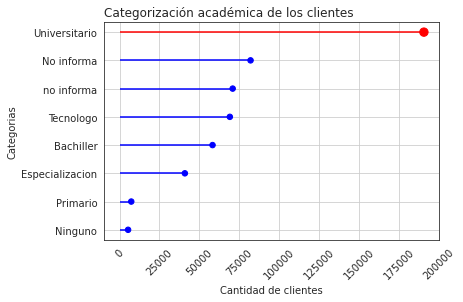

In [124]:
plt.hlines(y=my_range, xmin=0, xmax=na['Total'], color=my_color, alpha=1);
plt.scatter(na['Total'], my_range, color=my_color, s=my_size, alpha=1);
plt.tick_params(axis='x', rotation=45);
plt.yticks(my_range, na['estudios']);
plt.title("Categorización académica de los clientes", loc='left');
plt.xlabel('Cantidad de clientes');
plt.ylabel('Categorias');
plt.grid()
plt.savefig("estudiosAcademicos.png",bbox_inches='tight')

In [128]:
a = cs[cs["departamento"] == "Antioquia"]
b = cs[cs["departamento"] == "Bogota d.c."]

In [131]:
perc = 100*(a["Total"].values[0] + b["Total"].values[0])/524623
print(f"Porcentaje que representa antioquia y bogota en la población muestral: {perc}")

Porcentaje que representa antioquia y bogota en la población muestral: 54.414312754111045


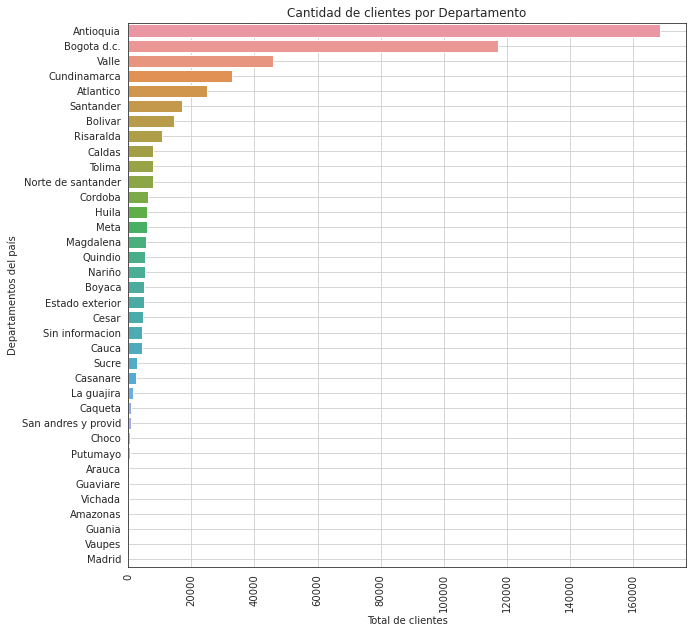

In [133]:
fig, ax = plt.subplots(figsize=(10,10));
sns.barplot(ax =ax, x = "Total", y = "departamento", data=cs);
ax.tick_params(axis='x', rotation=90);
ax.set_title("Cantidad de clientes por Departamento");
ax.set_xlabel("Total de clientes");
ax.set_ylabel("Departamentos del país");
plt.grid()
plt.savefig("totalPordepartamento.png",bbox_inches='tight')

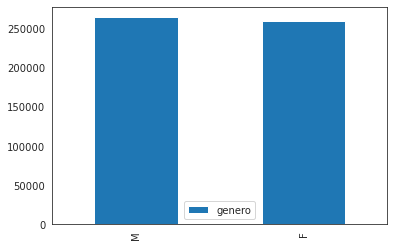

In [14]:
x = pd.DataFrame(categorical["genero"].value_counts())
x.plot.bar();

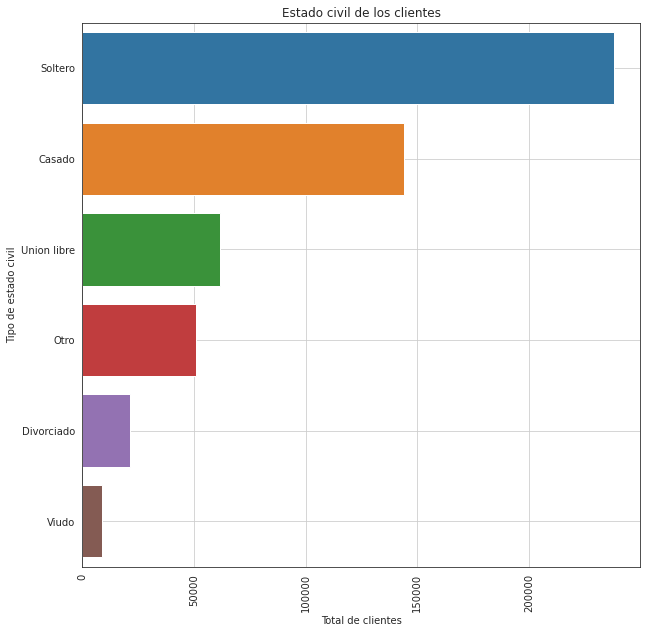

In [140]:
fig, ax = plt.subplots(figsize=(10,10));
sns.barplot(ax =ax, x = "Total", y = "status", data=ec);
ax.tick_params(axis='x', rotation=90);
ax.set_title("Estado civil de los clientes");
ax.set_xlabel("Total de clientes");
ax.set_ylabel("Tipo de estado civil");
plt.grid()
plt.savefig("estado_civil.png",bbox_inches='tight')

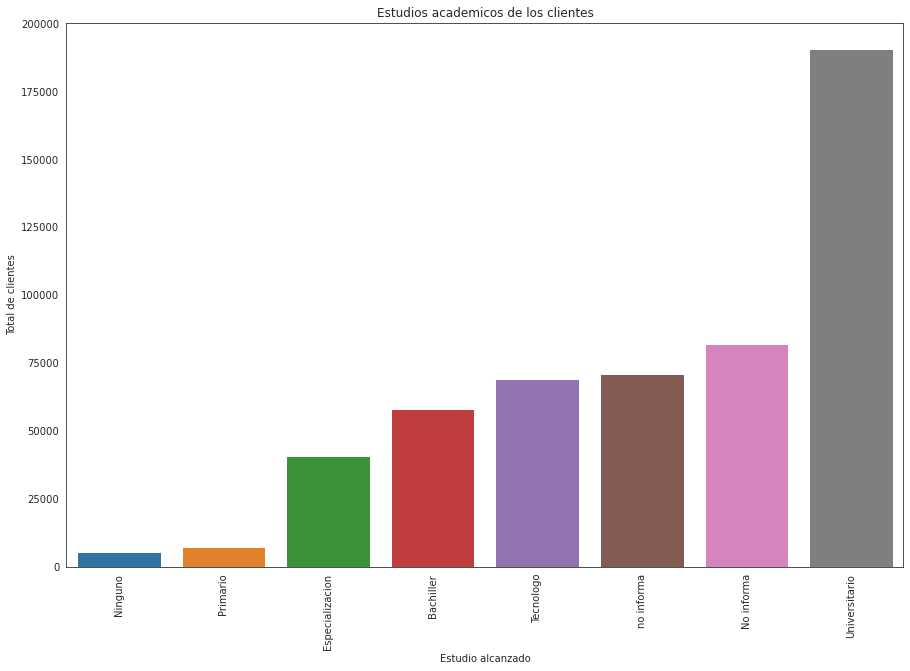

In [141]:
#x = pd.DataFrame(categorical["nivel_academico"].value_counts())
#x.plot.bar();

fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(ax =ax, x = "estudios", y = "Total", data=na);
ax.tick_params(axis='x', rotation=90);
ax.set_title("Estudios academicos de los clientes");
ax.set_ylabel("Total de clientes");
ax.set_xlabel("Estudio alcanzado");
#plt.savefig("totalestudios.png")

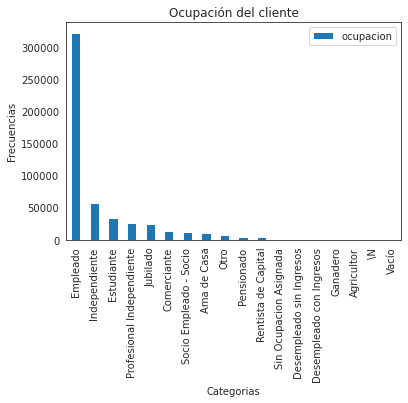

In [143]:
x = pd.DataFrame(categorical["ocupacion"].value_counts())
x.plot.bar();
plt.title("Ocupación del cliente");
plt.xlabel("Categorias");
plt.ylabel("Frecuencias");
plt.savefig("ocupacion.png",bbox_inches='tight' )

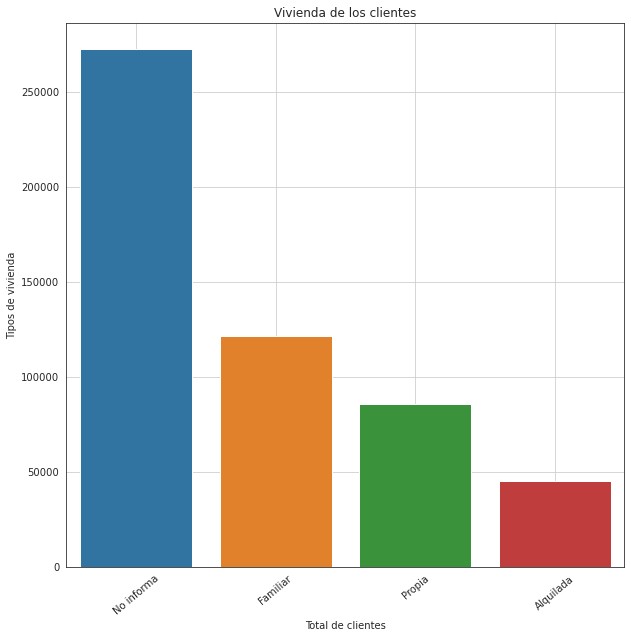

In [155]:
fig, ax = plt.subplots(figsize=(10,10));
sns.barplot(ax =ax, y = "Total", x = "tipo", data=tv);
ax.tick_params(axis='x', rotation=40);
ax.set_title("Vivienda de los clientes");
ax.set_xlabel("Total de clientes");
ax.set_ylabel("Tipos de vivienda");
plt.grid()
plt.savefig("vivienda.png",bbox_inches='tight')

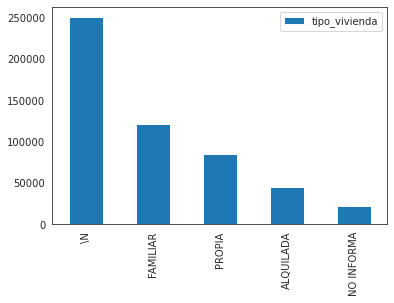

In [18]:
x = pd.DataFrame(categorical["tipo_vivienda"].value_counts())
x.plot.bar();

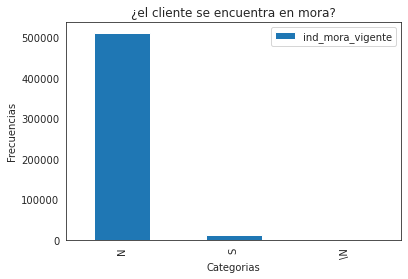

In [19]:
x = pd.DataFrame(categorical["ind_mora_vigente"].value_counts())
x.plot.bar();
plt.title("¿el cliente se encuentra en mora?");
plt.xlabel("Categorias");
plt.ylabel("Frecuencias");

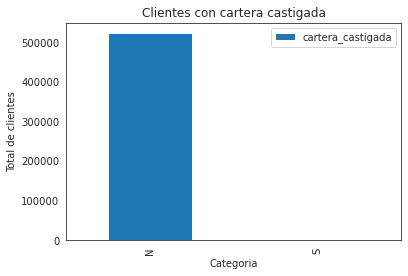

In [95]:
cc = categorical[categorical["cartera_castigada"] != "\\N"]
x = pd.DataFrame(cc["cartera_castigada"].value_counts())
x.plot.bar();
plt.title("Clientes con cartera castigada");
plt.ylabel("Total de clientes");
plt.xlabel("Categoria");
plt.savefig("carteraCastigada.png",)

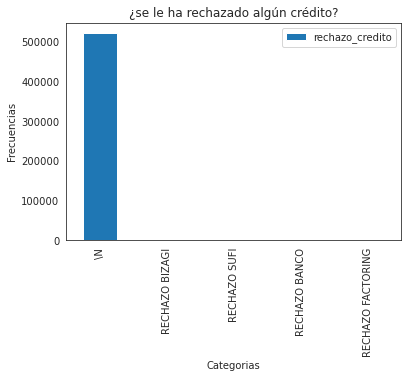

In [21]:
x = pd.DataFrame(categorical["rechazo_credito"].value_counts())
x.plot.bar();
plt.title("¿se le ha rechazado algún crédito?");
plt.xlabel("Categorias");
plt.ylabel("Frecuencias");

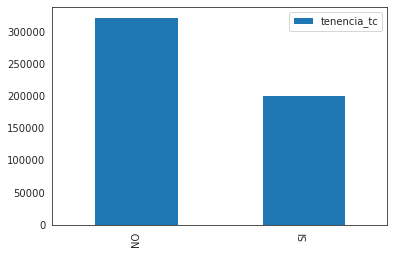

In [22]:
x = pd.DataFrame(categorical["tenencia_tc"].value_counts())
x.plot.bar();

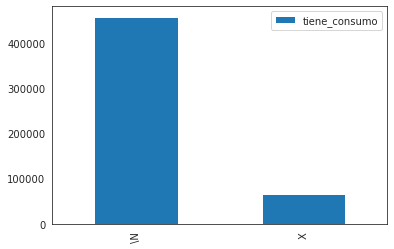

In [23]:
x = pd.DataFrame(categorical["tiene_consumo"].value_counts())
x.plot.bar();

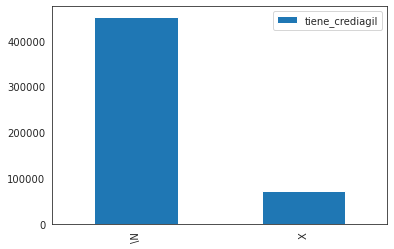

In [24]:
x = pd.DataFrame(categorical["tiene_crediagil"].value_counts())
x.plot.bar();

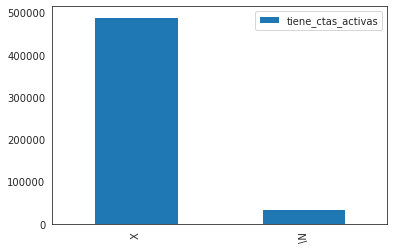

In [25]:
x = pd.DataFrame(categorical["tiene_ctas_activas"].value_counts())
x.plot.bar();

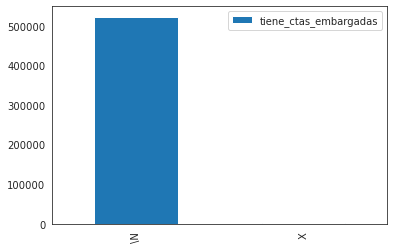

In [26]:
x = pd.DataFrame(categorical["tiene_ctas_embargadas"].value_counts())
x.plot.bar();

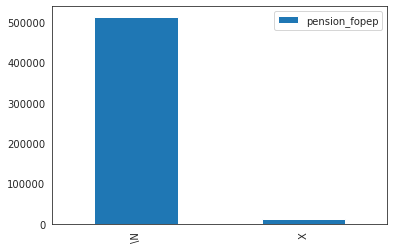

In [27]:
x = pd.DataFrame(categorical["pension_fopep"].value_counts())
x.plot.bar();

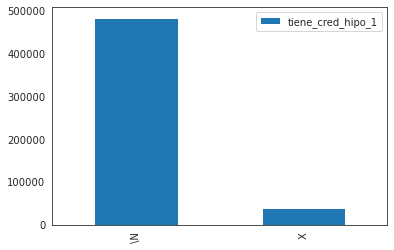

In [28]:
x = pd.DataFrame(categorical["tiene_cred_hipo_1"].value_counts())
x.plot.bar();

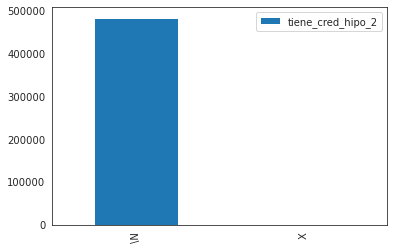

In [29]:
x = pd.DataFrame(categorical["tiene_cred_hipo_2"].value_counts())
x.plot.bar();

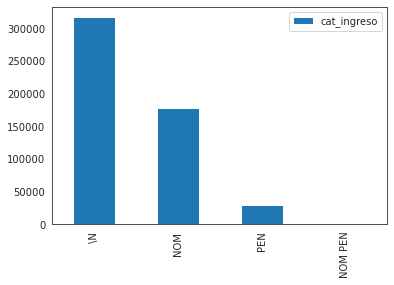

In [30]:
x = pd.DataFrame(categorical["cat_ingreso"].value_counts())
x.plot.bar();

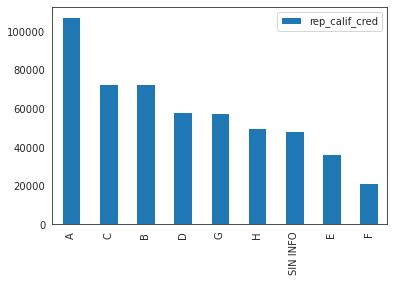

In [31]:
x = pd.DataFrame(categorical["rep_calif_cred"].value_counts())
x.plot.bar();

In [32]:
categorical["convenio_lib"].value_counts()

\N                   448653
70337                  5308
REVISAR CONVENIOS      2860
75597                  1454
70238                  1177
                      ...  
72724                     1
74287                     1
79711                     1
20072                     1
70590                     1
Name: convenio_lib, Length: 5328, dtype: int64

In [ ]:
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()

#### Variables a ser eliminadas por los siguientes motivos:

- cartera_castigada - no aporta suficiente información, a la mayoria de las personas no se les ha castigado la cartera
- rechazo_credito - no aporta suficiente información, a la mayoria no se les ha rechazado el credito
- tiene_ctas_embargadas - no aporta suficiente información, casi no hay cuentas embargadas
- pension_fopep - implicito en la var numerica, ya existe una variable que indica un valor por ingreso de pensión fopep
- cat_ingreso - implicito en la variable numerica, ya existen varias variables que implican la categoria del ingreso
- tiene_consumo - implicito en la variable numerica, ya existe una variable numerica que implicitamente indica si tiene credito de consumo
- tiene_crediagil - implicito en la variable numerica, ya existe una variable numerico que indica si el cliente tiene credi agil
- ocupación - tiene un sesgo demasiado alto hacia los trabajadores empleados y muy opoca información en general para el resto de sus categorias 
- tipo_vivienda - dificl hacer una consideración con tanto valor nulo
- rep_calif_cred - no se tendrá en consideración por el momento

In [33]:
 categorical = categorical.drop(["departamento_residencia","departamento_laboral","ciudad_residencia","ciudad_laboral",
               "profesion", "cartera_castigada", "rechazo_credito", "tiene_ctas_embargadas",
               "pension_fopep", "cat_ingreso", "tipo_vivienda", "rep_calif_cred"], axis = 1)

#### Binarización de variables categoricas

In [102]:
def binarize_yes_no(x: str) -> int:
    if x == "S" or x == "SI" or x == "X": return 1
    return 0

def binarize_genre(x: str) -> int:
    if x == "M": return 1
    return 0

def binarize_mora(x: float) -> int:
    if x > 0: return 1
    return 0

def binarize_lib(x: str) -> int:
    if x == "\\N": return 0
    return 1

In [103]:
categorical["genero"] = categorical["genero"].apply(binarize_genre)
categorical["ind_mora_vigente"] = categorical["ind_mora_vigente"].apply(binarize_yes_no)
categorical["tenencia_tc"] = categorical["tenencia_tc"].apply(binarize_yes_no)
categorical["tiene_consumo"] = categorical["tiene_consumo"].apply(binarize_yes_no)
categorical["tiene_crediagil"] = categorical["tiene_crediagil"].apply(binarize_yes_no)
categorical["tiene_ctas_activas"] = categorical["tiene_ctas_activas"].apply(binarize_yes_no)
categorical["convenio_lib"] = categorical["convenio_lib"].apply(binarize_lib)
categorical["tiene_cred_hipo_1"] = categorical["tiene_cred_hipo_1"].apply(binarize_yes_no)
categorical["tiene_cred_hipo_2"] = categorical["tiene_cred_hipo_2"].apply(binarize_yes_no)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### Transformación de variables categoricas

Para el caso de las demas variables categoricas se realizará una simplificación mucho más fuerte de la siguiente manera:

- estado_civil -> comparte_gastos (1 o 0), para los casos de casado y union libre, se considerará que la pareja comparte sus gastos.
- nivel_academico -> Ingreso_profesional (1 o 0), en caso de tener perfil universitario o especialización, se considerara positivo para un ingreso profesional
- ocupación -> contrato_def_indef (1 o 0), en caso de ser desempleado se considerará negativo para un ingreso propio
- [tiene_consumo, tiene_crediagil, convenio_lib, tiene_cred_hipo_1, tiene_cred_hipo_1] -> credito activo (1 o 0), en caso de que algunas de las asociadas a creditos sea positivam, se considerara que el cliente tiene credito activo 

In [104]:
def binarize_civil_status(x: str) -> int:
    if x == "CASADO" or x == "UNION LIBRE": return 1
    return 0

def binarize_academic_level(x: str) -> int:
    if x == "UNIVERSITARIO" or x == "ESPECIALIZACION" or x == "TECNOLOGO": return 1
    return 0

def binarize_occupation(x: str) -> int:
    if x == "Empleado": return 1
    return 0

def binarize_home(x: str) -> int:
    if x == "" or x == "": return 1
    return 0

In [105]:
categorical["comparte_gastos"] = categorical["estado_civil"].apply(binarize_civil_status)
categorical["ingreso_profesional"] = categorical["nivel_academico"].apply(binarize_academic_level)
categorical["contrato_def_indef"] = categorical["ocupacion"].apply(binarize_occupation)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [106]:
# TODO: arreglar la mora vigente que no deberia estar aca
categorical["credito_activo"] = categorical["convenio_lib"] \
                                | categorical["tiene_consumo"] | categorical["tiene_crediagil"] \
                                | categorical["tiene_cred_hipo_1"] | categorical["tiene_cred_hipo_2"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


categorical = categorical.drop(["estado_civil", "nivel_academico", "ocupacion",
                                "ind_mora_vigente", "convenio_lib", "tiene_consumo",
                                "tiene_crediagil", "tiene_cred_hipo_1", "tiene_cred_hipo_2"], 
                               axis = 1)

In [107]:
categorical.dtypes

genero                       int64
estado_civil                object
nivel_academico             object
profesion                   object
ocupacion                   object
tipo_vivienda               object
ind_mora_vigente             int64
cartera_castigada           object
ciudad_residencia           object
departamento_residencia     object
ciudad_laboral              object
departamento_laboral        object
rechazo_credito             object
tenencia_tc                  int64
tiene_consumo                int64
tiene_crediagil              int64
tiene_ctas_activas           int64
tiene_ctas_embargadas       object
pension_fopep               object
tiene_cred_hipo_1            int64
tiene_cred_hipo_2            int64
cat_ingreso                 object
rep_calif_cred              object
convenio_lib                 int64
ind                        float64
gasto_familiar             float64
comparte_gastos              int64
ingreso_profesional          int64
contrato_def_indef  

In [40]:
100*list(categorical["credito_activo"].value_counts())[1]/524623

39.08368485560107

In [41]:
data = list(categorical["credito_activo"].value_counts())
group = ["No", "Si"]

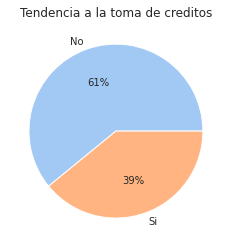

In [42]:
colors = sns.color_palette('pastel')[0:2]

plt.pie(data, labels = group, colors = colors, autopct='%.0f%%')
plt.title("Tendencia a la toma de creditos")
plt.savefig("tomaCreditos.jpg")
plt.show()

In [108]:
categorical["ind"] = numerical["ind"]
categorical["gasto_familiar"] = numerical["gasto_familiar"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


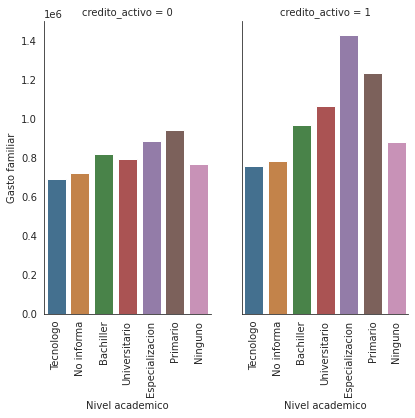

In [110]:
ax = sns.catplot(x="nivel_academico", y="gasto_familiar", col="credito_activo",
                data=categorical, saturation=.5,
                kind="bar", ci=None, aspect=.6);
ax.set_xticklabels(rotation = 90);
ax.set(xlabel='Nivel academico', ylabel='Gasto familiar');
#plt.savefig('gastoFamiliar_credito_academico.png',bbox_inches='tight')

In [45]:
6*1e6

6000000.0

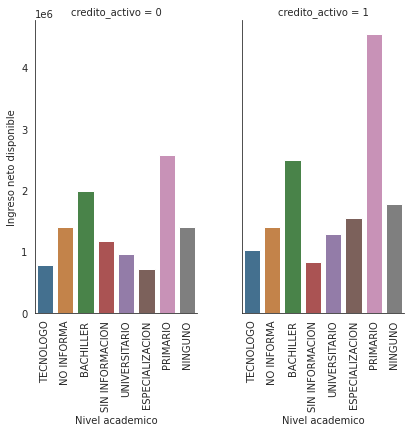

In [46]:
ax = sns.catplot(x="nivel_academico", y="ind", col="credito_activo",
                data=categorical, saturation=.5,
                kind="bar", ci=None, aspect=.6);
ax.set_xticklabels(rotation = 90);
ax.set(xlabel='Nivel academico', ylabel='Ingreso neto disponible');
#plt.savefig('gastoFamiliar_credito_academico.png',bbox_inches='tight')

In [48]:
academic_credit = pd.DataFrame(categorical[["nivel_academico","credito_activo"]].groupby("nivel_academico").sum()).reset_index()
academic_credit = academic_credit.sort_values(by='credito_activo')
academic_credit.to_csv("creditos_activos_to_academic.csv", index = False)

### Variables numericas

#### Imputación de valores nulos

In [36]:
numerical.isna().sum()

periodo                               0
id_cli                                0
fecha_nacimiento                      0
edad                                111
ult_actual                            0
categoria                          5417
codigo_ciiu                           0
mora_max                         149564
cant_moras_30_ult_12_meses       149564
cant_moras_60_ult_12_meses       149564
cant_moras_90_ult_12_meses       149564
cupo_total_tc                         0
cuota_tc_bancolombia                  0
nro_tot_cuentas                      11
ctas_activas                         11
ctas_embargadas                      11
cuota_cred_hipot                 483715
mediana_nom3                          0
mediana_pen3                          0
ingreso_nompen                        0
ingreso_final                      3826
cant_mora_30_tdc_ult_3m_sf        81232
cant_mora_30_consum_ult_3m_sf     81232
cuota_de_vivienda                     0
cuota_de_consumo                      0


La edad y la categoria son variables que no deben imputarse, asi que se eliminaran los registros que contengan valores nulos, los demás se rellenaran con 0 dado que la naturaleza de su variable lo permite

In [37]:
numerical = numerical.dropna(subset = ["categoria", "edad"])
numerical = numerical.fillna(0)

#### Analisis de distribución

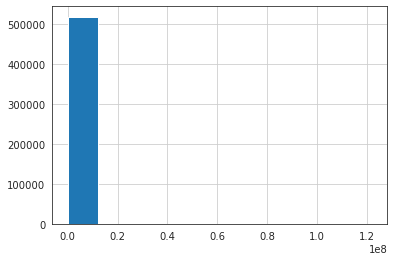

In [38]:
numerical["cuota_tc_bancolombia"].hist();

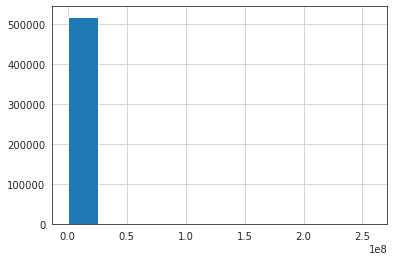

In [39]:
numerical["cuota_de_vivienda"].hist();

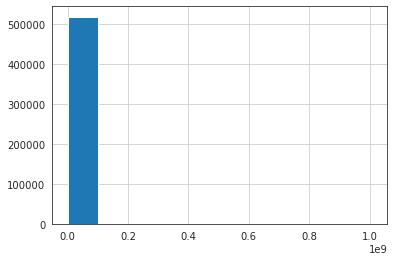

In [40]:
numerical["cuota_rotativos"].hist();

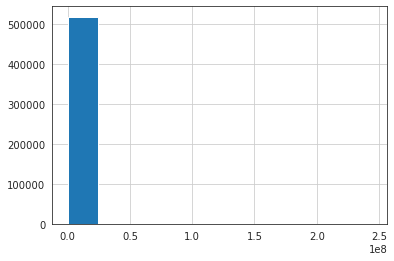

In [41]:
numerical["cuota_tc_mdo"].hist();

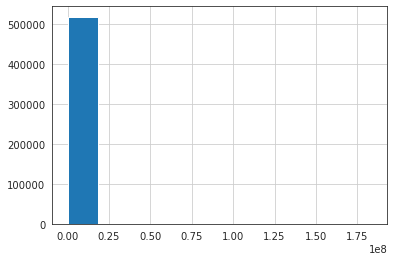

In [42]:
numerical["cuota_libranza_sf"].hist();

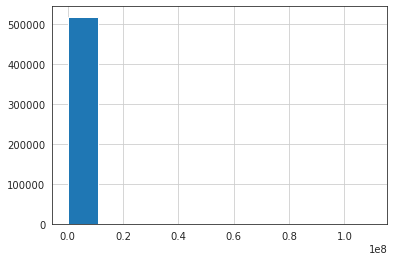

In [43]:
numerical["cuota_tarjeta_de_credito"].hist();

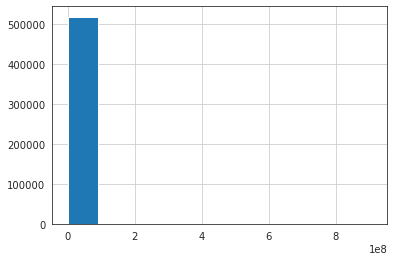

In [44]:
numerical["cuota_de_sector_solidario"].hist();

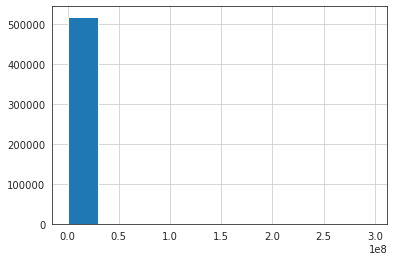

In [45]:
numerical["cuota_sector_real_comercio"].hist();

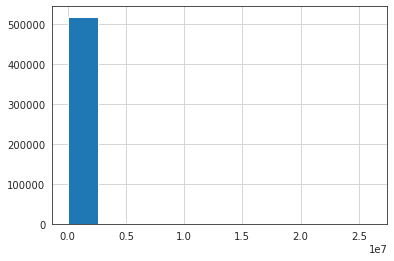

In [46]:
numerical["cuota_cred_hipot"].hist();

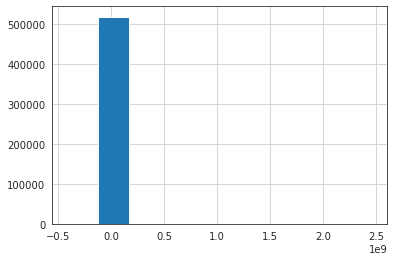

In [47]:
numerical["cuota_de_consumo"].hist();

Todas las cuotas presentan valores minimos en cero, no es que sean muy representativas estas graficas pero nos dan una idea sobre la magnitud de los datos, en este caso, podemos observar que para el credito de consumo existen valores negativos, por lo cual estos datos seran limpiados y convertidos en 0

In [48]:
numerical["cuota_de_consumo"] = np.where(numerical["cuota_de_consumo"] < 0, 0, numerical["cuota_de_consumo"])

In [49]:
numerical[["cuota_cred_hipot", "cuota_de_vivienda"]].head(30)

,cuota_cred_hipot,cuota_de_vivienda
0,0.00000,0.00000
1,0.00000,0.00000
2,0.00000,0.00000
3,0.00000,0.00000
4,0.00000,0.00000
5,0.00000,0.00000
6,0.00000,0.00000
7,0.00000,0.00000
8,0.00000,0.00000
9,0.00000,0.00000


In [50]:
f = numerical[numerical["cuota_cred_hipot"] != 0]
f[["cuota_cred_hipot", "cuota_de_vivienda"]].head(30)

,cuota_cred_hipot,cuota_de_vivienda
57,1290827.03000,1290827.03000
58,1294561.03000,1294561.03000
60,1084391.16000,1084391.16000
66,630691.38000,630691.38000
67,634447.38000,634447.38000
93,840767.05000,840767.05000
102,1630003.42000,1630003.42000
103,1619466.42000,1619466.42000
115,738411.27000,738411.27000
132,223726.64500,223726.64500


De las tablas anteriores podemos observar que un credito hipotecario es a su vez un credito de vivienda, pero no en el sentido contrario, por lo tanto, se realizara una transformación sobre estas 2 variables, tomando el valor maximo entre las 2 columnas

In [51]:
numerical['cuota_cred_hipot'] = numerical[['cuota_cred_hipot', 'cuota_de_vivienda']].max(axis=1)

In [52]:
numerical["total_cuotas"] = numerical["cuota_tc_bancolombia"] + numerical["cuota_cred_hipot"] \
                            + numerical["cuota_de_consumo"] + numerical["cuota_rotativos"] \
                            + numerical["cuota_tarjeta_de_credito"] + numerical["cuota_de_sector_solidario"] \
                            + numerical["cuota_libranza_sf"] + numerical["cuota_tc_mdo"]

In [53]:
numerical = numerical.drop(["cuota_tc_bancolombia", "cuota_cred_hipot", "cuota_de_consumo",
                            "cuota_rotativos", "cuota_tarjeta_de_credito", "cuota_de_sector_solidario",
                            "cuota_libranza_sf", "cuota_tc_mdo", "cuota_de_vivienda",
                            "cuota_sector_real_comercio"], axis = 1)

In [54]:
numerical[["ingreso_nomina","ingreso_nompen"]].head()

,ingreso_nomina,ingreso_nompen
0,1255032.00000,1255032.00000
1,0.00000,0.00000
2,0.00000,0.00000
3,0.00000,0.00000
4,4353538.00000,4353538.00000


Para el caso de los ingresos de nomina y nompen, ocurre exactamente lo mismo que para el credito hipotecario y el credito de vivienda, asi que se hará una reducción similar ademas de sumarlo con el ingreso por seguridad social

In [55]:
numerical["ingreso_oc"] = numerical['ingreso_segurida_social']  +  \
                          numerical[['ingreso_nompen', 'ingreso_nomina']].max(axis=1)

In [56]:
numerical[["ingreso_oc","ingreso_final"]].head()

,ingreso_oc,ingreso_final
0,1255032.00000,1391032.00000
1,0.00000,2327500.00000
2,0.00000,6519750.00000
3,1484205.00000,1484205.00000
4,7853538.00000,4353334.00000


En la tabla anterior puede observarse que ocurre el mismo femoneno (nuevamente) de la cuota por credito hipotecario y de vivienda, asi que se dejara el valor mayor entre el ingreso por otros conceptos y el ingreso final

In [57]:
numerical["ingreso_corregido"] = numerical[['ingreso_final', 'ingreso_oc']].max(axis=1)

In [58]:
numerical = numerical.drop(["ingreso_segurida_social", "ingreso_oc", "ingreso_nomina",
                            "ingreso_nompen", "ingreso_final"], axis = 1)

In [59]:
numerical = numerical.drop(["id_cli", "fecha_nacimiento", "ult_actual", "codigo_ciiu"], axis = 1)

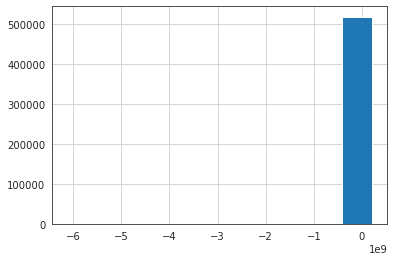

In [60]:
numerical["ind"].hist();

In [61]:
numerical["ind"] = np.where(numerical["ind"] < 0, 0, numerical["ind"])

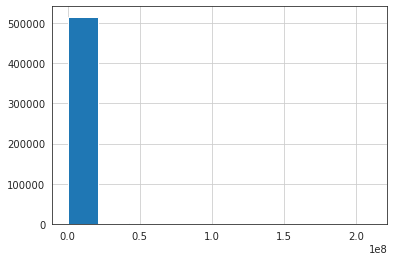

In [62]:
numerical["ind"].hist();

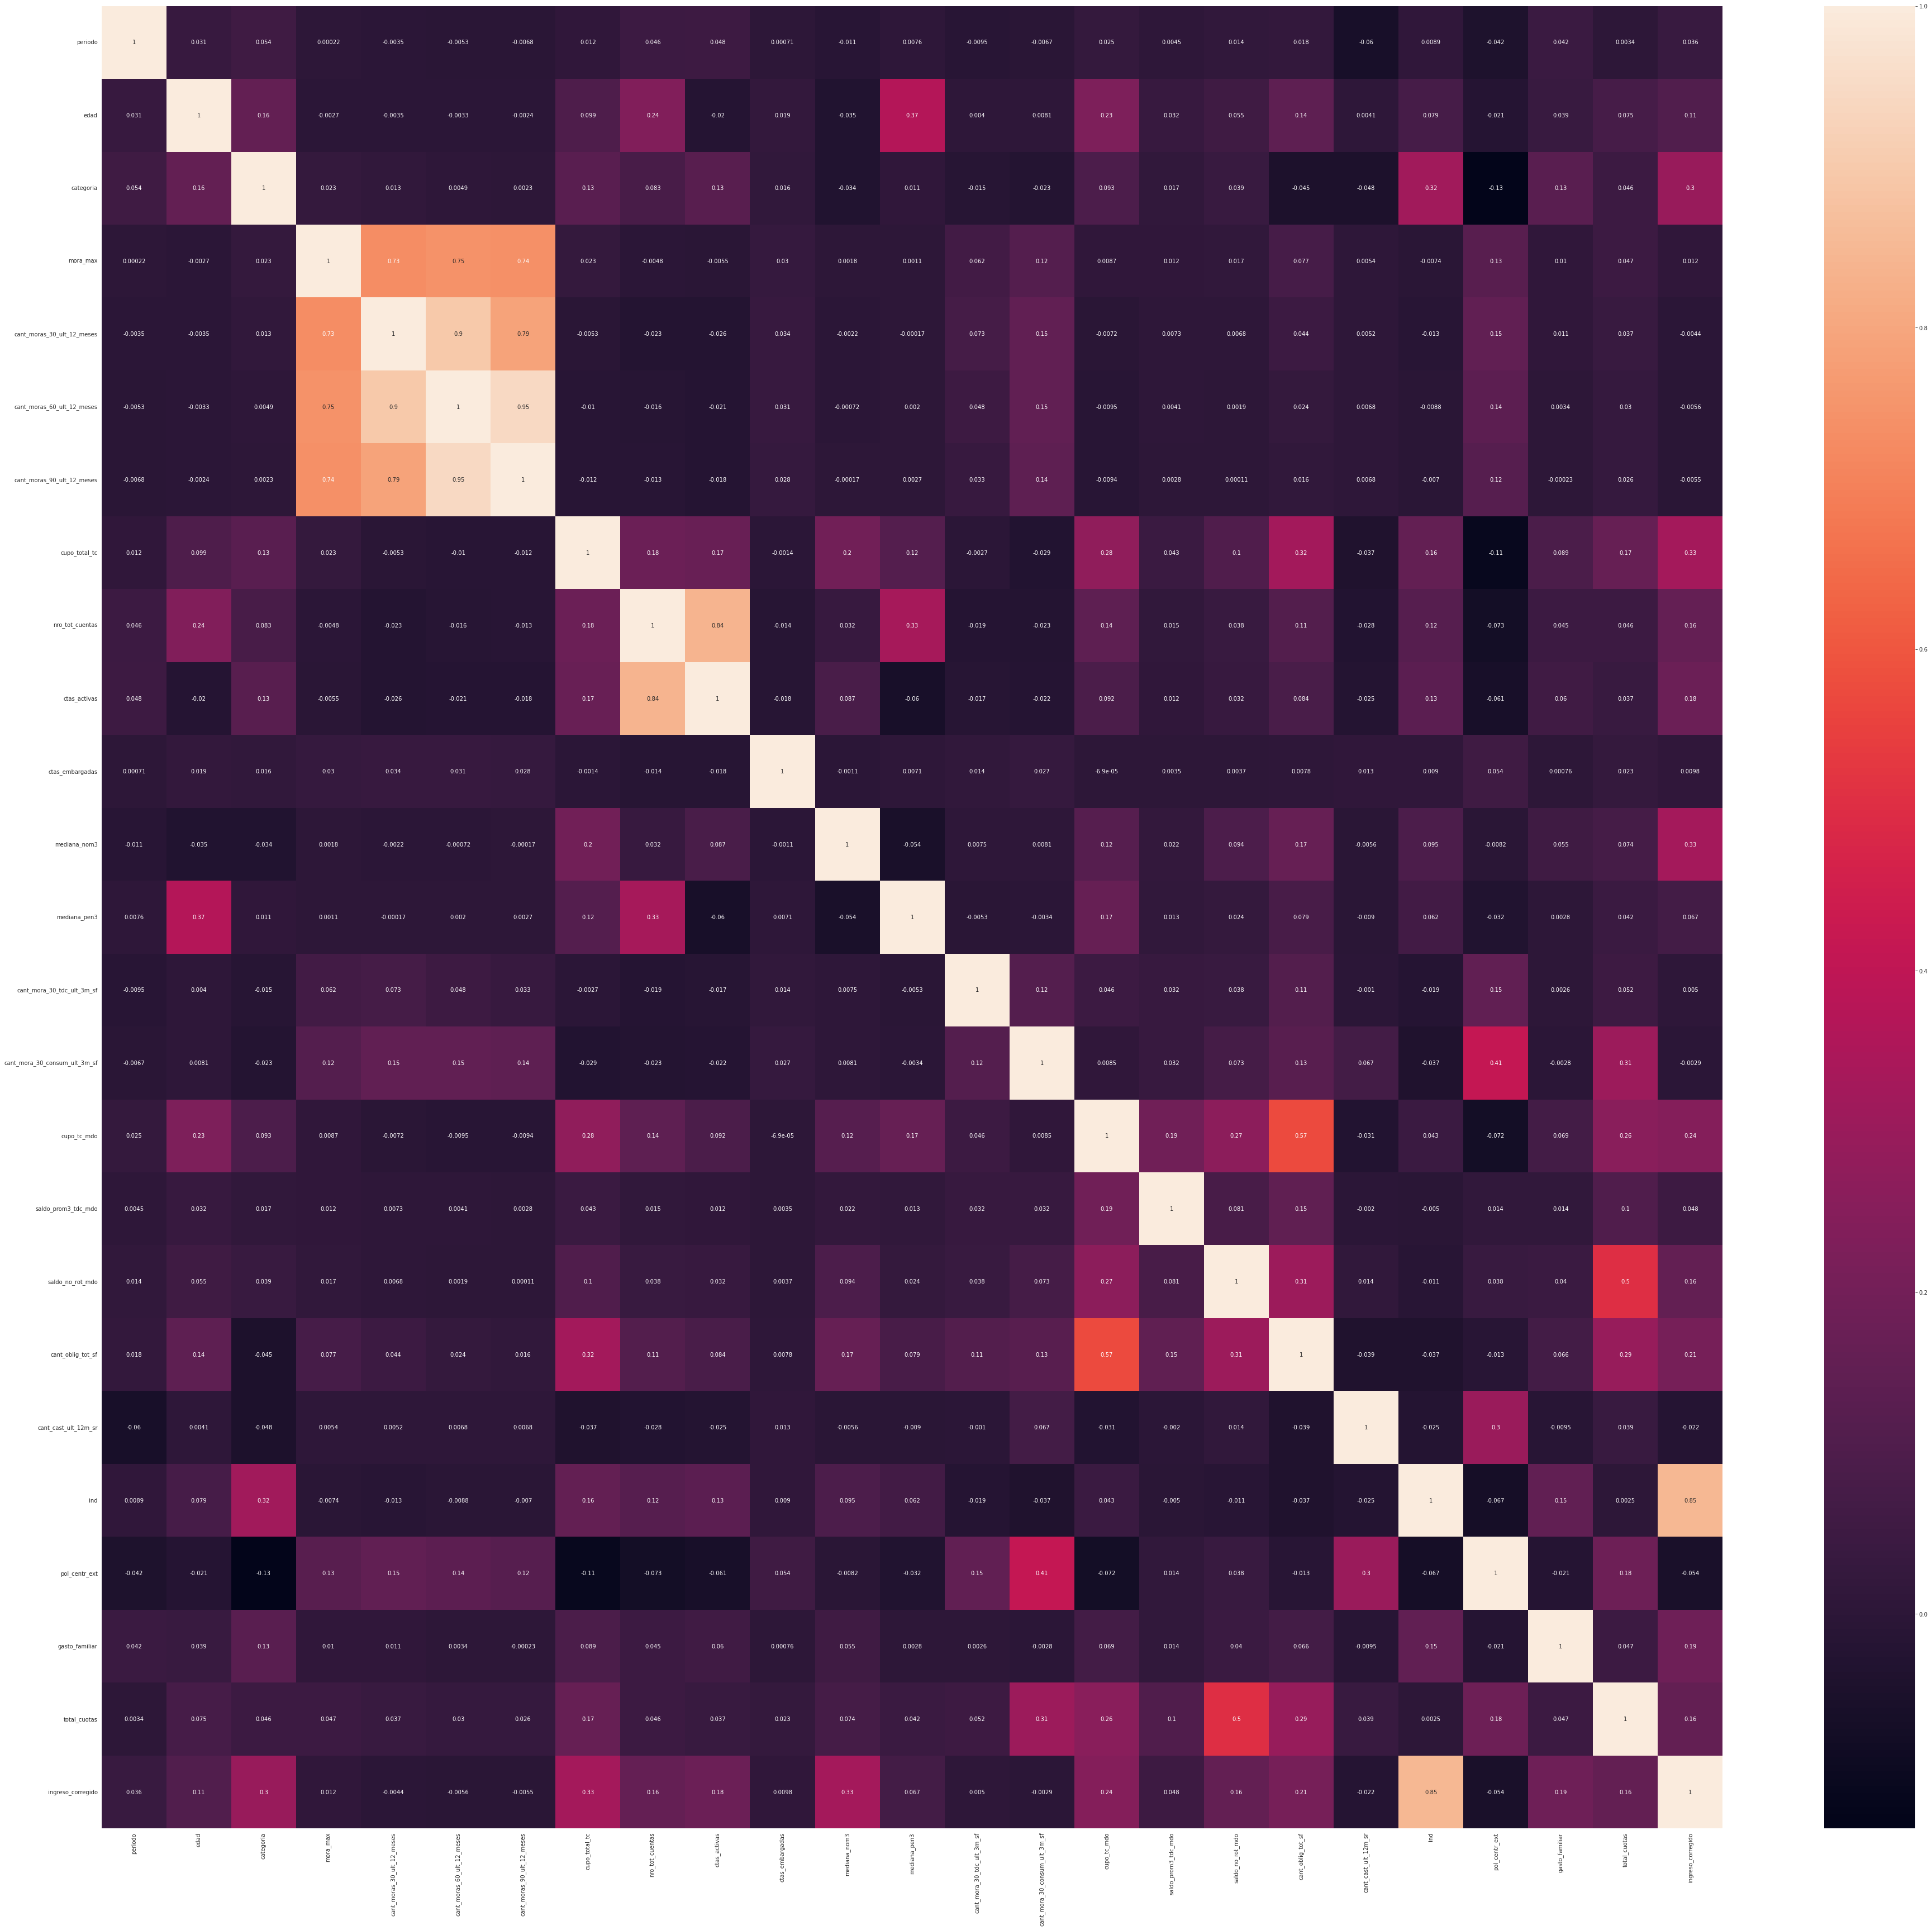

In [63]:
plt.figure(figsize = (65,60))
corrMatrix = numerical.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

del diagrama de correlación anterior puede determinarse que se eliminaran las variables relacionadas con la mora, dado que presentan una correlación muy alta. Ademas, el ingreso corregido presenta una alta correlación con el ind, por lo tanto se opta por la eliminación del ingreso corregido

In [64]:
numerical = numerical.drop(["cant_moras_30_ult_12_meses", "cant_moras_60_ult_12_meses", "cant_moras_90_ult_12_meses", 
                            "ingreso_corregido"], axis = 1)

## Limpieza del dataset

In [49]:
df["genero"] = df["genero"].apply(binarize_genre)
df["ind_mora_vigente"] = df["ind_mora_vigente"].apply(binarize_yes_no)
df["tenencia_tc"] = df["tenencia_tc"].apply(binarize_yes_no)
df["tiene_consumo"] = df["tiene_consumo"].apply(binarize_yes_no)
df["tiene_crediagil"] = df["tiene_crediagil"].apply(binarize_yes_no)
df["tiene_ctas_activas"] = df["tiene_ctas_activas"].apply(binarize_yes_no)
df["convenio_lib"] = df["convenio_lib"].apply(binarize_lib)
df["tiene_cred_hipo_1"] = df["tiene_cred_hipo_1"].apply(binarize_yes_no)
df["tiene_cred_hipo_2"] = df["tiene_cred_hipo_2"].apply(binarize_yes_no)

In [50]:
df["comparte_gastos"] = df["estado_civil"].apply(binarize_civil_status)
df["ingreso_profesional"] = df["nivel_academico"].apply(binarize_academic_level)
df["contrato_def_indef"] = df["ocupacion"].apply(binarize_occupation)

In [51]:
df["credito_activo"] = df["ind_mora_vigente"] | df["convenio_lib"] \
                        | df["tiene_consumo"] | df["tiene_crediagil"] \
                        | df["tiene_cred_hipo_1"] | df["tiene_cred_hipo_2"]

In [52]:
df = df.dropna(subset = ["categoria", "edad"])
df = df.fillna(0)

In [53]:
df["cuota_de_consumo"] = np.where(df["cuota_de_consumo"] < 0, 0, df["cuota_de_consumo"])

In [54]:
df['cuota_cred_hipot'] = df[['cuota_cred_hipot', 'cuota_de_vivienda']].max(axis=1)

In [55]:
df["total_cuotas"] = df["cuota_tc_bancolombia"] + df["cuota_cred_hipot"] \
                        + df["cuota_de_consumo"] + df["cuota_rotativos"] \
                        + df["cuota_tarjeta_de_credito"] + df["cuota_de_sector_solidario"] \
                        + df["cuota_libranza_sf"] + df["cuota_tc_mdo"]

In [56]:
df["ingreso_oc"] = df['ingreso_segurida_social']  +  \
                    df[['ingreso_nompen', 'ingreso_nomina']].max(axis=1)

In [57]:
df["ingreso_corregido"] = df[['ingreso_final', 'ingreso_oc']].max(axis=1)

In [58]:
df["ind"] = np.where(df["ind"] < 0, 0, df["ind"])

#### Eliminación de outliers

In [59]:
max_gf = df.gasto_familiar.quantile(0.95)
min_gf = df.gasto_familiar.quantile(0.05)
max_ind = df.ind.quantile(0.95)
min_ind = df.ind.quantile(0.05)

In [60]:
df = df[(df['ind'] > min_ind) & (df['ind']< max_ind)]
df = df[(df['gasto_familiar'] > min_gf) & (df['gasto_familiar']< max_gf)]

In [61]:
# TODO: Agregar departamento residencia si no funciona la suposición
df = df.drop(["departamento_laboral","ciudad_residencia","ciudad_laboral",
               "profesion", "cartera_castigada", "rechazo_credito", "tiene_ctas_embargadas",
               "pension_fopep", "cat_ingreso", "tipo_vivienda", "rep_calif_cred",
               "estado_civil", "nivel_academico", "ocupacion",
               "ind_mora_vigente", "convenio_lib", "tiene_consumo",
               "tiene_crediagil", "tiene_cred_hipo_1", "tiene_cred_hipo_2",
               "cuota_tc_bancolombia", "cuota_cred_hipot", "cuota_de_consumo",
               "cuota_rotativos", "cuota_tarjeta_de_credito", "cuota_de_sector_solidario",
               "cuota_libranza_sf", "cuota_tc_mdo", "cuota_de_vivienda",
               "cuota_sector_real_comercio", "ingreso_segurida_social", "ingreso_oc", 
               "ingreso_nomina", "ingreso_nompen", "ingreso_final",
               "id_cli", "fecha_nacimiento", "ult_actual", "codigo_ciiu",
               "cant_moras_30_ult_12_meses", "cant_moras_60_ult_12_meses", 
               "cant_moras_90_ult_12_meses", "ingreso_corregido"
              ], axis = 1)

In [62]:
df.head()

,periodo,edad,genero,categoria,departamento_residencia,mora_max,cupo_total_tc,tenencia_tc,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,mediana_nom3,mediana_pen3,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cupo_tc_mdo,saldo_prom3_tdc_mdo,saldo_no_rot_mdo,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,pol_centr_ext,gasto_familiar,comparte_gastos,ingreso_profesional,contrato_def_indef,credito_activo,total_cuotas
0,202003,35.63860,1,1.00000,VALLE,0.00000,0.00000,0,1.00000,1.00000,1,0.00000,1255032.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,695516.00000,0.00000,304687.00000,0,1,1,0,0.00000
1,201902,32.47639,1,4.00000,VALLE,0.00000,0.00000,0,1.00000,1.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1187025.00000,0.00000,187990.00000,1,0,0,0,0.00000
2,202001,28.93634,1,4.00000,ANTIOQUIA,0.00000,0.00000,1,1.00000,1.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3879251.25000,0.00000,862348.92000,0,1,0,0,0.00000
3,202008,29.88364,1,1.00000,ANTIOQUIA,1.00000,0.00000,0,1.00000,1.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2555000.00000,0.00000,1.00000,210681.47500,7.00000,1056864.00000,0,0,1,0,0.00000
4,202001,40.48186,0,1.00000,CUNDINAMARCA,0.00000,0.00000,0,1.00000,1.00000,1,0.00000,4353538.00000,0.00000,0.00000,0.00000,25800000.00000,16242500.00000,211000.00000,4.00000,0.00000,1615755.80000,0.00000,248386.00000,0,0,1,1,2154578.00000


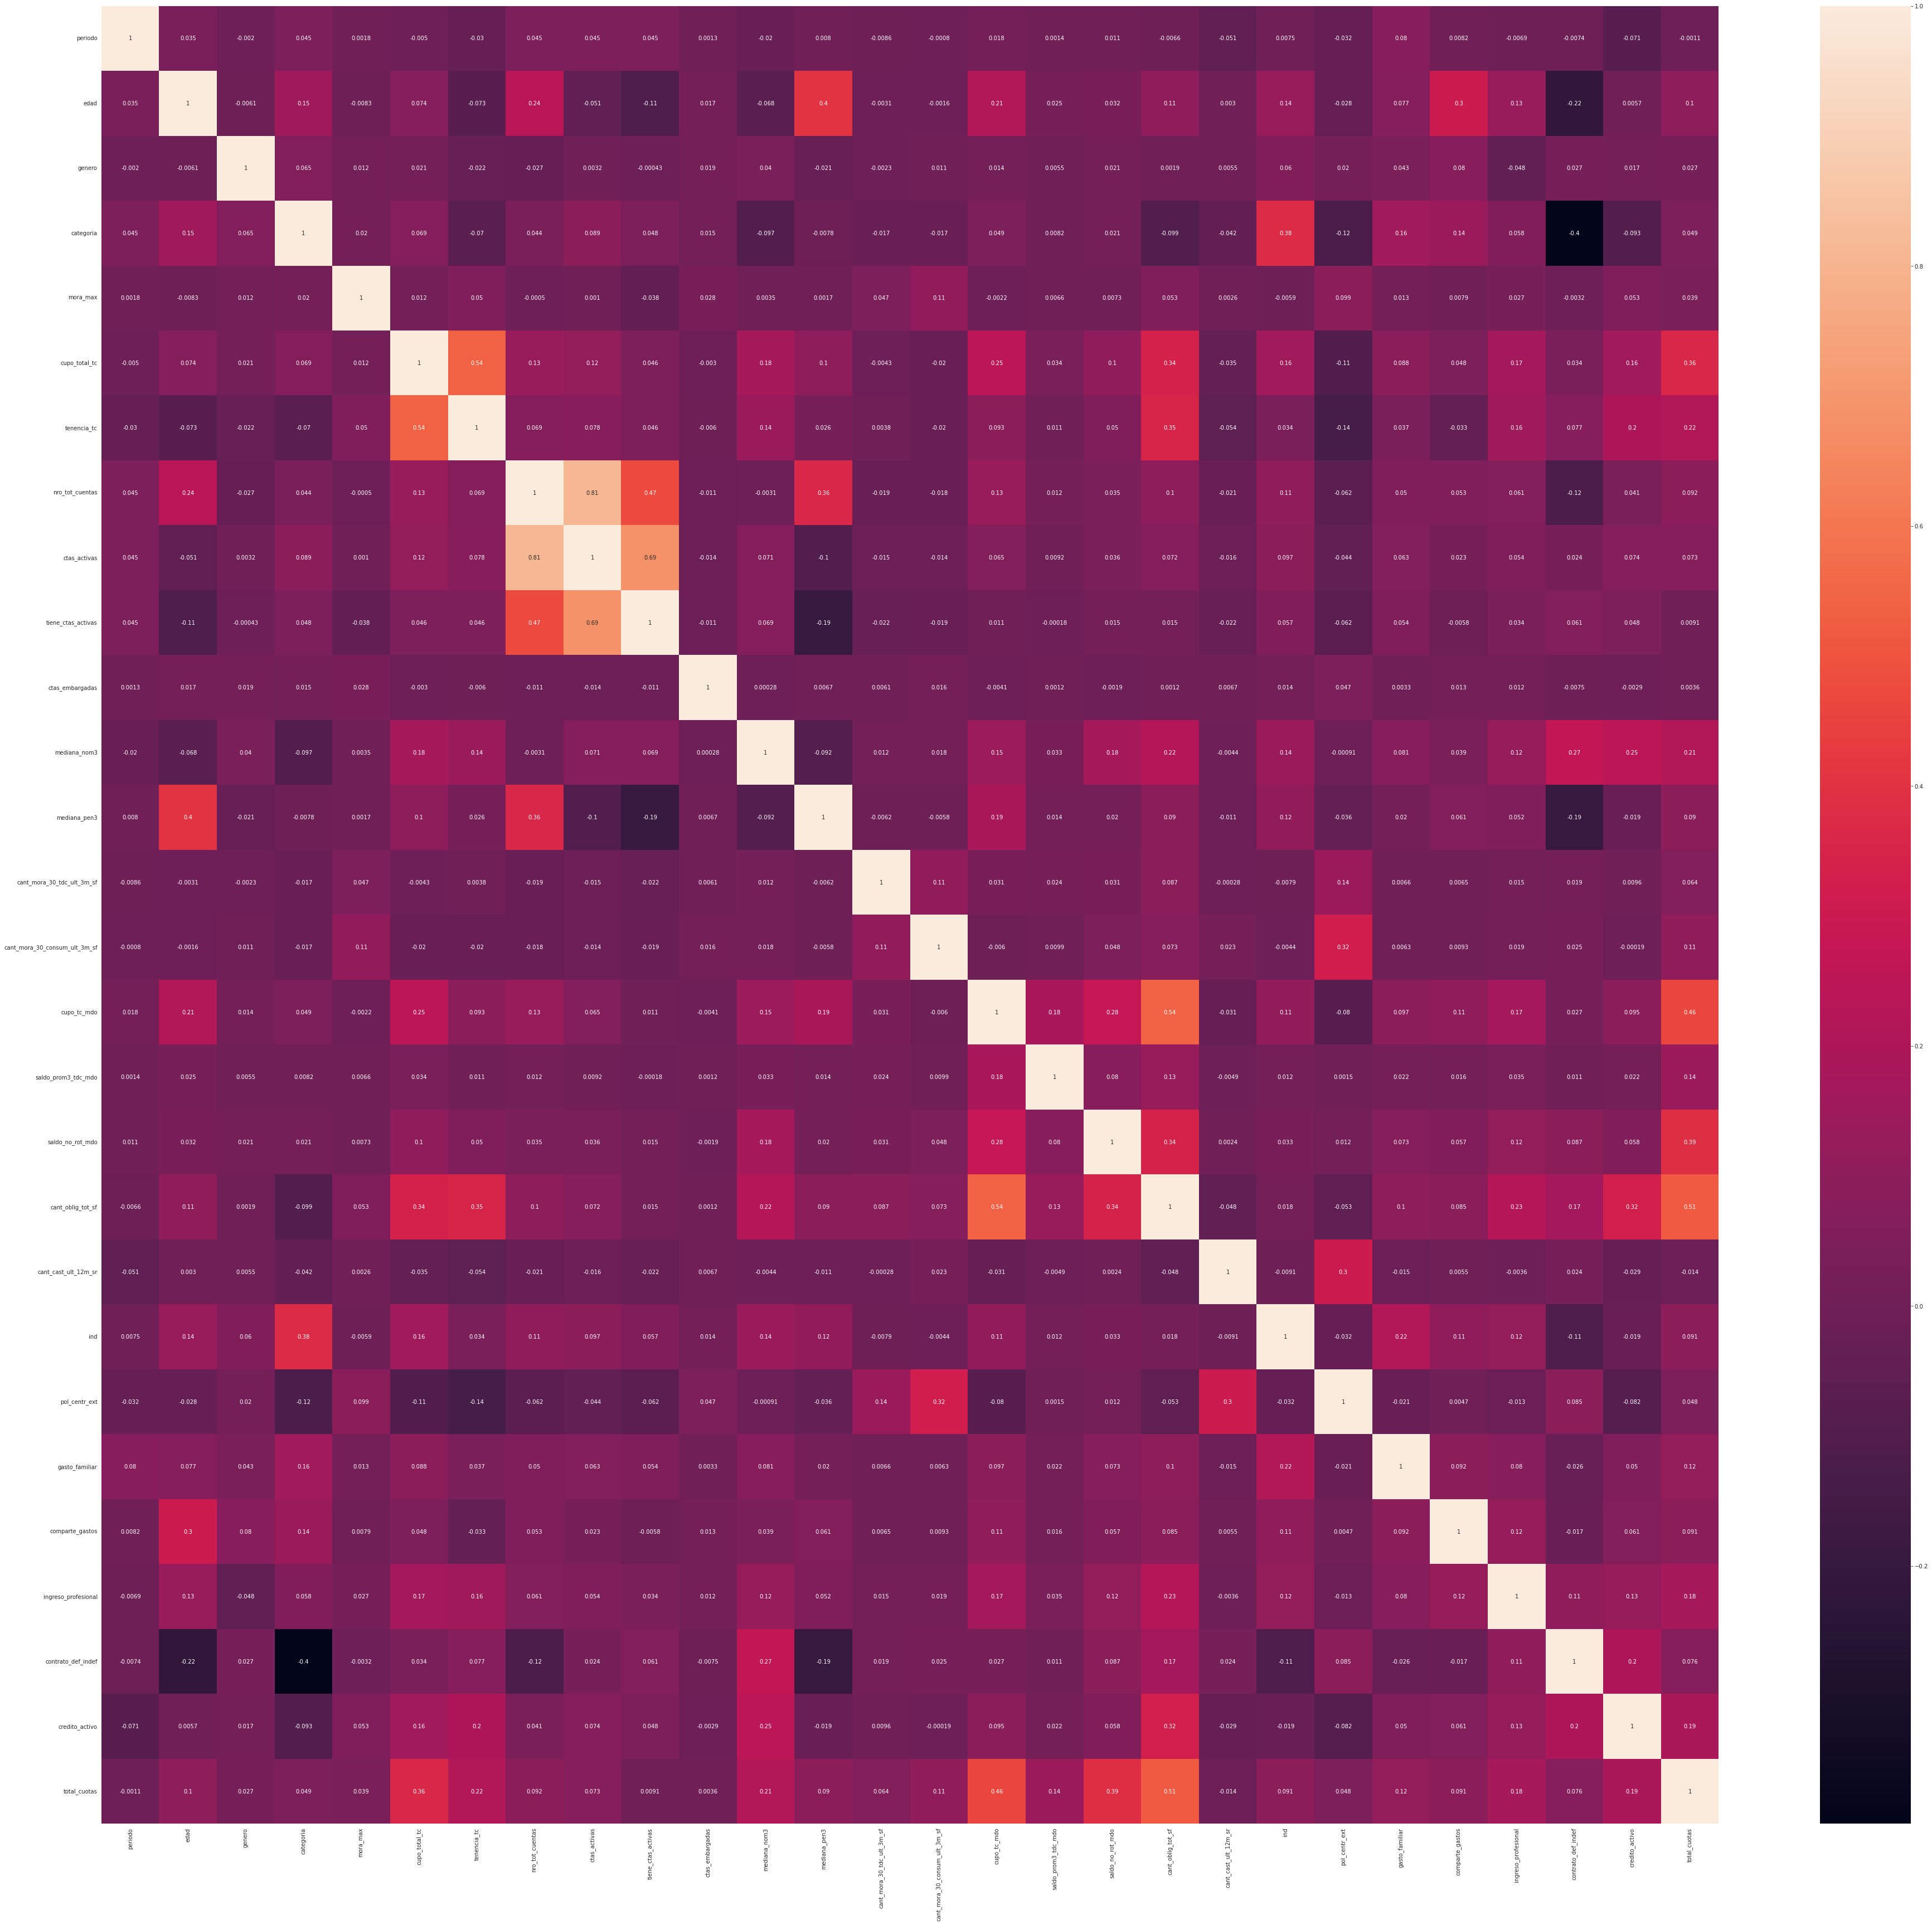

In [63]:
plt.figure(figsize = (65,60))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Del diagrama de correlación anterior se eliminaran las variables de cupo_total_tc, tiene_ctas_activas y cant_oblig_tot_sf, por alta correlación con otras variables

In [64]:
df = df.drop(["cupo_total_tc", "tiene_ctas_activas", "cant_oblig_tot_sf", "periodo"], axis = 1)

In [1]:
df.describe()

NameError: name 'df' is not defined

## Modelos Nuevos cesgos a Antioquia

Selección del departamento de residencia

In [65]:
df = df[df["departamento_residencia"] == "ANTIOQUIA"]
del df["departamento_residencia"]

In [66]:
X_A = df.drop(["gasto_familiar"], axis = 1)
Y_A = df["gasto_familiar"]

### Herramientas para modelar

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV

### GradientBoostTree

In [69]:
scoring = ["r2", "neg_mean_absolute_percentage_error"]

In [112]:
GBReg = GradientBoostingRegressor(n_estimators=50, 
                                  max_depth = 15,
                                  random_state = 101,
                                  subsample = 0.5,
                                  verbose = 2)

scores = cross_validate(GBReg, X_A, Y_A,return_train_score = True, cv=5, scoring = scoring)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 283524379235.9145  4628349713.6479           17.72s
         2 271349311660.9986  4308536754.6553           17.24s
         3 263599052375.0524  2914955615.2137           16.84s
         4 253429244512.0056  2119201548.6532           16.50s
         5 243849617836.2225  1769135061.8177           16.12s
         6 238984910599.5101  1333529120.5374           15.76s
         7 231358209739.1257  1273252485.7937           15.45s
         8 226990126593.2663   676504758.1924           15.09s
         9 220563333701.6682   377828962.1320           14.73s
        10 216720490046.2455   323024785.9691           14.40s
        11 210510501270.5290    84469098.2636           14.04s
        12 211473920850.2417  -105877203.6734           13.70s
        13 203641748320.4905  -218050056.5098           13.34s
        14 202055324875.0510   -46202166.0497           13.02s
        15 198161202019.8415  -203855180.9237          

In [113]:
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")

Entrenamiento: 0.5210803549915994
Test: 0.032638190795675495


In [114]:
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: -85.98324850800779
Test: -154.0321385031774


In [116]:
GBReg = GradientBoostingRegressor(n_estimators=50, 
                                  max_depth = 15,
                                  random_state = 101,
                                  subsample = 0.5,
                                  verbose = 2)
regr = make_pipeline(StandardScaler(), GBReg)

scores = cross_validate(regr, X_A, Y_A,return_train_score = True, cv=5, scoring = scoring)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 283524379235.9145  4627862101.3184           18.12s
         2 271357278031.6993  4361292432.4117           17.84s
         3 263262984993.5430  3069120796.8191           17.25s
         4 253664297227.6278  2354022694.6388           16.74s
         5 243303087488.4881  1507285918.4823           16.28s
         6 238829670618.0998  1403794173.4330           15.87s
         7 230592140838.4301  1109520509.4312           15.48s
         8 225124052219.7599   651655221.6452           15.11s
         9 219334311512.9024   310745103.1813           14.75s
        10 215864324957.5721   363178973.7365           14.41s
        11 209229519679.4526   -94291800.7957           14.06s
        12 209961808594.1814   -14013184.1879           13.70s
        13 202060954045.1281  -101603293.4500           13.35s
        14 199518134880.0266  -272656081.4196           12.99s
        15 197472340307.4641  -247109101.9161          

In [117]:
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")

Entrenamiento: 0.5189295907006519
Test: 0.03567460247066816


In [118]:
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: -87.84106845308213
Test: -137.49354329482102


### GBT Complejizado

In [92]:
GBReg = GradientBoostingRegressor(n_estimators=500, 
                                  max_depth = 15,
                                  random_state = 101,
                                  subsample = 0.5)

scores = cross_validate(GBReg, X_A, Y_A,return_train_score = True, cv=5, scoring = scoring)

KeyboardInterrupt: 

In [95]:
# TODO: Volver a correr
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: 0.8273592752104838
Test: 0.05651355468242782
Entrenamiento: -80.34407935988114
Test: -190.18926877868512


In [94]:
from sklearn.model_selection import train_test_split

In [96]:
XA_train, XA_test, yA_train, yA_test = train_test_split(X_A, Y_A, test_size=0.3, random_state = 11)

In [97]:
GBReg.fit(XA_train, yA_train)

GradientBoostingRegressor(max_depth=15, n_estimators=500, random_state=101,
                          subsample=0.5)

In [98]:
yA_pred = GBReg.predict(XA_test)

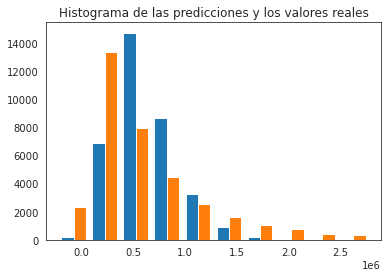

In [112]:
plt.hist([yA_pred, yA_test]);
plt.title("Histograma de las predicciones y los valores reales");

In [100]:
residual = yA_test - yA_pred

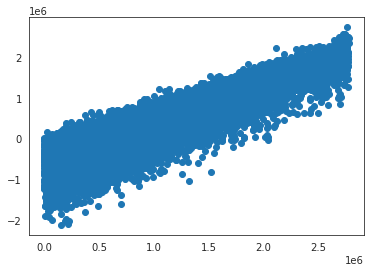

In [101]:
plt.scatter(yA_test, residual);

In [103]:
ap_residuals = np.abs(residual) / yA_test

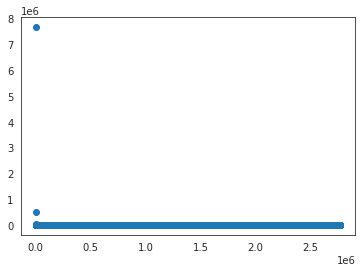

In [105]:
plt.scatter(yA_test,ap_residuals);

In [106]:
lap_residuals = np.log(ap_residuals)

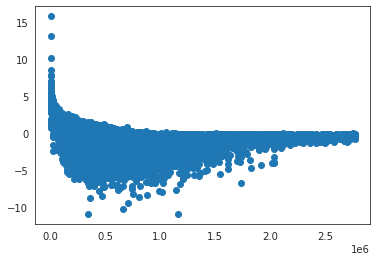

In [108]:
plt.scatter(yA_test,lap_residuals);

In [113]:
def mean_absolute_percentage_error(y_pred, y_true):
    y_true = np.where(y_true == 0, 0.0000000001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [114]:
mape = mean_absolute_percentage_error(yA_pred, yA_test)
mape

238.02662033983748

In [70]:
GBReg = GradientBoostingRegressor(n_estimators=500, 
                                  max_depth = 60,
                                  random_state = 101,
                                  subsample = 0.5,
                                  verbose = 2)

scores = cross_validate(GBReg, X_A, Y_A,return_train_score = True, cv=5, scoring = scoring)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 247371725927.8817  2923520254.1782            4.94m
         2 222283049226.0882  2710658123.3297            4.95m
         3 201380150449.1808  1686058465.3396            4.92m
         4 180495407134.1483   831744768.2964            4.91m
         5 162975479956.7512   220097370.7372            4.89m
         6 147911689289.8299   -93512855.0706            4.90m
         7 133131446229.6655  -327187866.1051            4.91m
         8 120668424158.8082  -705008143.5593            4.94m
         9 109592482982.1192 -1028328440.9609            4.98m
        10 99385327553.1861 -1005075601.8304            5.03m
        11 90219535088.0843 -1135618049.6103            5.04m
        12 83856691069.5667 -1080789797.6307            5.06m
        13 74778530255.8351 -1051513675.8993            5.08m
        14 68454456043.7715  -967141094.8607            5.11m
        15 62712089453.4530  -999729027.3693            5.14

In [71]:
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: 0.9999999999999775
Test: -0.07793775841665482
Entrenamiento: -5.558153772502925e-06
Test: -110.18270454406407


### Reducción de dimensionalidad por PCA

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10).fit(X_A)
pca

XA_PCA = pca.transform(X_A)
XA_PCA

array([[-1.03669512e+07, -3.36613348e+06, -1.73920144e+05, ...,
        -2.01618408e+00,  1.33049621e+01,  7.93710972e-01],
       [-7.84100872e+06, -3.74912491e+06, -1.05645014e+05, ...,
        -1.30374988e+00,  8.41281932e+00, -6.25420642e+00],
       [-1.03698349e+07, -3.38784938e+06, -1.27228799e+05, ...,
        -2.21054848e+00,  6.01077362e+00, -2.30982842e+00],
       ...,
       [-4.69820630e+06, -4.15093241e+06, -1.38844662e+05, ...,
        -2.33424084e+00,  9.57921859e+00, -2.19959132e+00],
       [-6.31636827e+06,  2.61080500e+07,  1.11018106e+07, ...,
        -4.71192332e+00, -1.54724637e+00,  8.36022239e-01],
       [-1.03395063e+07, -3.35572608e+06, -9.37907180e+04, ...,
        -2.37998350e+00, -2.71350808e+00,  6.69137819e-01]])

In [84]:
GBReg = GradientBoostingRegressor(n_estimators=50, 
                                  max_depth = 15,
                                  random_state = 101,
                                  subsample = 0.5,
                                  verbose = 2)

scores = cross_validate(GBReg, XA_PCA, Y_A,return_train_score = True, cv=5, scoring = scoring)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1 284176970164.6661  4519105477.0487           28.86s
         2 272269556949.3156  3738294824.5606           28.21s
         3 265050698778.8486  2940162391.0334           27.79s
         4 254917423567.7651  2102298728.5374           27.20s
         5 247007369490.2296  1582799739.0720           26.71s
         6 242035760751.2296  1197882537.3141           26.18s
         7 233720203303.1809   610448238.3964           25.58s
         8 226432832244.7835   373147929.4059           24.98s
         9 222628688222.1433   275717032.9539           24.49s
        10 217691944983.1812   121695612.0284           23.99s
        11 214525668501.3146   237952426.4664           23.46s
        12 215692972633.4099  -207114058.6379           22.97s
        13 207555275623.8867   -39003693.4070           22.44s
        14 203005058935.7508  -413951801.2936           21.88s
        15 201603599002.3119  -299715771.0807          

In [83]:
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: 0.9999992098760917
Test: -0.09442099062737012
Entrenamiento: -0.06810436798879255
Test: -175.97970036022494


### Random forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
regr = RandomForestRegressor(n_estimators = 150, max_depth=30, random_state=0)
scores = cross_validate(regr, X_A, Y_A,return_train_score = True, cv=5, scoring = scoring)

In [90]:
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")

Entrenamiento: 0.8273592752104838
Test: 0.05651355468242782


In [91]:
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: -80.34407935988114
Test: -190.18926877868512


### ElasticNet

In [115]:
regr = make_pipeline(StandardScaler(), ElasticNetCV(random_state = 0))

scores = cross_validate(regr, X_A, Y_A,return_train_score = True, cv=5, scoring = scoring)

In [116]:
print(f"Entrenamiento: {np.mean(scores['train_r2'])}")
print(f"Test: {np.mean(scores['test_r2'])}")

Entrenamiento: 0.002757051442200975
Test: 0.0026602301376466462


In [117]:
print(f"Entrenamiento: {np.mean(scores['train_neg_mean_absolute_percentage_error'])}")
print(f"Test: {np.mean(scores['test_neg_mean_absolute_percentage_error'])}")

Entrenamiento: -155.94547125861874
Test: -155.9479175872993


## Modelos Antigüos

In [365]:
X = df.drop(["gasto_familiar"], axis = 1)
Y = df["gasto_familiar"]

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=7)

In [367]:
ENReg = ElasticNetCV(random_state = 0)
ENReg.fit(X_train, y_train)

ElasticNetCV(random_state=0)

In [368]:
def mean_absolute_percentage_error(y_pred, y_true):
    y_true = np.where(y_true == 0, 0.0000000001, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [369]:
y_pred = ENReg.predict(X_test)

In [370]:
mape = mean_absolute_percentage_error2(y_pred, y_test)
mape

77.3601438145303

In [278]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'verbose': 2,
          'loss': 'huber','alpha':0.95}

GBReg = GradientBoostingRegressor(**params).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 157431102781.6893            8.83m
         2 153142775919.2596            8.86m
         3 149581412006.6627            8.87m
         4 146672816531.3174            8.88m
         5 144305903021.7981            8.89m
         6 142330854716.1695            8.88m
         7 140693991372.4206            8.88m
         8 139322549001.3343            8.87m
         9 138167115220.7721            8.86m
        10 137208416193.2222            8.84m
        11 136393870108.4748            8.83m
        12 135702078394.0191            8.81m
        13 135119836935.3476            8.80m
        14 134608854090.0948            8.78m
        15 134161849404.5903            8.77m
        16 133770272795.7695            8.75m
        17 133448294346.6677            8.74m
        18 133168267632.0603            8.71m
        19 132893850253.2310            8.69m
        20 132641110942.5196            8.67m
        21 132431949636.4560      

In [279]:
y_pred = GBReg.predict(X_test)

In [283]:
mape = mean_absolute_percentage_error(y_pred, y_test)*100
mape

8418.205434138285

In [371]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

regr = make_pipeline(StandardScaler(), ElasticNetCV(random_state = 0))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv', ElasticNetCV(random_state=0))])

In [372]:
y_pred = regr.predict(X_test)
mape = mean_absolute_percentage_error(y_pred, y_test)
mape

65.13632296618107

In [ ]:
sv = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, verbose=True))
sv.fit(X_train, y_train)

[LibSVM]..............................

In [ ]:
y_pred = sv.predict(X_test)
mape = mean_absolute_percentage_error(y_pred, y_test)
mape